In [84]:
import pandas as pd


### N - ratio of Nitrogen content in soil
## P - ratio of Phosphorous content in soil
## K - ratio of Potassium content in soil
## temperature - temperature in degree Celsius
## humidity - relative humidity in %
## ph - ph value of the soil
## rainfall - rainfall in mm

In [85]:
df = pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [86]:
# step1 ===> convert p,n,k --->0-100
df2=df.copy()

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
mms= MinMaxScaler((0,100))
df2[["N"]]=mms.fit_transform(df[["N"]])

In [89]:
df2[["P"]]=mms.fit_transform(df[["P"]])
df2[["K"]]=mms.fit_transform(df[["K"]])

In [90]:
df2

,N,P,K,temperature,humidity,ph,rainfall,label
0,64.285714,26.428571,19.0,20.879744,82.002744,6.502985,202.935536,rice
1,60.714286,37.857143,18.0,21.770462,80.319644,7.038096,226.655537,rice
2,42.857143,35.714286,19.5,23.004459,82.320763,7.840207,263.964248,rice
3,52.857143,21.428571,17.5,26.491096,80.158363,6.980401,242.864034,rice
4,55.714286,26.428571,18.5,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,76.428571,20.714286,13.5,26.774637,66.413269,6.780064,177.774507,coffee
2196,70.714286,7.142857,11.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,84.285714,20.000000,12.5,24.131797,67.225123,6.362608,173.322839,coffee
2198,83.571429,19.285714,14.5,26.272418,52.127394,6.758793,127.175293,coffee


In [91]:
df2.label.unique().shape

(22,)

In [92]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [93]:
df2.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [94]:
label_names = (pd.Series(df.label.unique()).sort_values()).values

In [95]:
class_map={}
j=0
for name in label_names:
    class_map[name]=j
    j+=1

    

In [96]:
class_map

{'apple': 0,
 'banana': 1,
 'blackgram': 2,
 'chickpea': 3,
 'coconut': 4,
 'coffee': 5,
 'cotton': 6,
 'grapes': 7,
 'jute': 8,
 'kidneybeans': 9,
 'lentil': 10,
 'maize': 11,
 'mango': 12,
 'mothbeans': 13,
 'mungbean': 14,
 'muskmelon': 15,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 18,
 'pomegranate': 19,
 'rice': 20,
 'watermelon': 21}

In [97]:
df2["label"]=df2["label"].map(class_map)

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

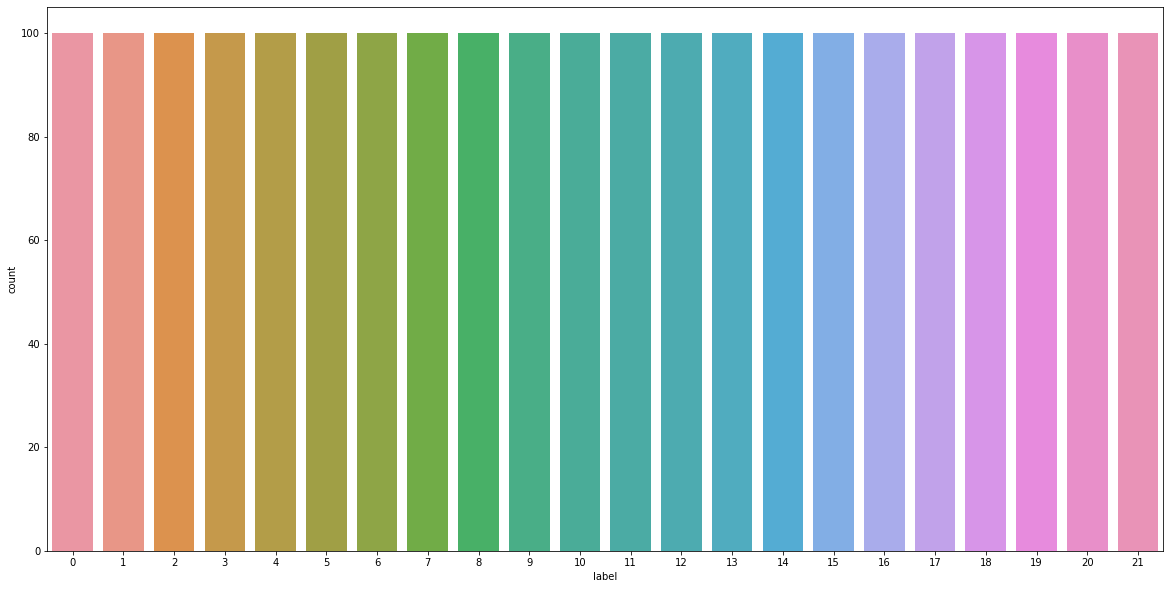

In [99]:
plt.figure(figsize=(20,10))
sns.countplot(x="label",data=df2)

In [79]:
df["label"].value_counts()  # 100 records per crop

pomegranate    100
cotton         100
jute           100
chickpea       100
kidneybeans    100
maize          100
watermelon     100
pigeonpeas     100
lentil         100
blackgram      100
apple          100
banana         100
mango          100
grapes         100
papaya         100
coconut        100
rice           100
orange         100
mungbean       100
mothbeans      100
coffee         100
muskmelon      100
Name: label, dtype: int64

In [100]:
import tensorflow as tf


In [101]:
layers= [
    tf.keras.layers.Dense(units=200,activation="relu",input_shape=(7,)),
    tf.keras.layers.Dense(units=100,activation="relu"),
    tf.keras.layers.Dense(units=22,activation="softmax")
    
]

In [102]:
model= tf.keras.models.Sequential(layers)
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [103]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 200)               1600      
                                                                 
 dense_11 (Dense)            (None, 100)               20100     
                                                                 
 dense_12 (Dense)            (None, 22)                2222      
                                                                 
Total params: 23,922
Trainable params: 23,922
Non-trainable params: 0
_________________________________________________________________


In [104]:
from sklearn.model_selection import train_test_split
X,y=df2.drop("label",axis=1),df2.label

x_tr,x_ts,y_tr,y_ts=train_test_split(X,y,test_size=0.1,random_state=20,stratify=y)

In [105]:
x_tr.shape

(1980, 7)

In [106]:
x_ts.shape

(220, 7)

In [107]:
y_tr.value_counts()

0     90
1     90
20    90
19    90
18    90
17    90
16    90
15    90
14    90
13    90
12    90
11    90
10    90
9     90
8     90
7     90
6     90
5     90
4     90
3     90
2     90
21    90
Name: label, dtype: int64

In [108]:
y_ts.value_counts()

0     10
1     10
20    10
19    10
18    10
17    10
16    10
15    10
14    10
13    10
12    10
11    10
10    10
9     10
8     10
7     10
6     10
5     10
4     10
3     10
2     10
21    10
Name: label, dtype: int64

In [111]:
hist=model.fit(x_tr,y_tr,validation_split=0.2,epochs=500,use_multiprocessing=True)

Epoch 1/500
50/50 [==============================] - 0s 6ms/step - loss: 0.0891 - accuracy: 0.9628 - val_loss: 0.3339 - val_accuracy: 0.9141
Epoch 2/500
50/50 [==============================] - 0s 5ms/step - loss: 0.1080 - accuracy: 0.9602 - val_loss: 0.0953 - val_accuracy: 0.9646
Epoch 3/500
50/50 [==============================] - 0s 5ms/step - loss: 0.0752 - accuracy: 0.9697 - val_loss: 0.0853 - val_accuracy: 0.9646
Epoch 4/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9716 - val_loss: 0.1405 - val_accuracy: 0.9495
Epoch 5/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9766 - val_loss: 0.1759 - val_accuracy: 0.9444
Epoch 6/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0750 - accuracy: 0.9691 - val_loss: 0.0937 - val_accuracy: 0.9697
Epoch 7/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9678 - val_loss: 0.1055 - val_accuracy: 0.9596
Epoch 8/500
5

Epoch 59/500
50/50 [==============================] - 0s 5ms/step - loss: 0.0719 - accuracy: 0.9716 - val_loss: 0.1791 - val_accuracy: 0.9470
Epoch 60/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0587 - accuracy: 0.9779 - val_loss: 0.1147 - val_accuracy: 0.9571
Epoch 61/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0607 - accuracy: 0.9729 - val_loss: 0.0788 - val_accuracy: 0.9823
Epoch 62/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0782 - accuracy: 0.9691 - val_loss: 0.1018 - val_accuracy: 0.9470
Epoch 63/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9710 - val_loss: 0.0915 - val_accuracy: 0.9596
Epoch 64/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.0876 - val_accuracy: 0.9646
Epoch 65/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9785 - val_loss: 0.0973 - val_accuracy: 0.9596
Epoch 

50/50 [==============================] - 0s 4ms/step - loss: 0.0587 - accuracy: 0.9798 - val_loss: 0.1234 - val_accuracy: 0.9545
Epoch 117/500
50/50 [==============================] - 0s 5ms/step - loss: 0.0546 - accuracy: 0.9779 - val_loss: 0.0758 - val_accuracy: 0.9747
Epoch 118/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9747 - val_loss: 0.0964 - val_accuracy: 0.9697
Epoch 119/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0579 - accuracy: 0.9779 - val_loss: 0.0738 - val_accuracy: 0.9697
Epoch 120/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0552 - accuracy: 0.9792 - val_loss: 0.1716 - val_accuracy: 0.9369
Epoch 121/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0621 - accuracy: 0.9766 - val_loss: 0.1201 - val_accuracy: 0.9545
Epoch 122/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0615 - accuracy: 0.9729 - val_loss: 0.0956 - val_accuracy: 0.9520
Epoch 123/500

50/50 [==============================] - 0s 4ms/step - loss: 0.0487 - accuracy: 0.9811 - val_loss: 0.0796 - val_accuracy: 0.9722
Epoch 174/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9779 - val_loss: 0.1326 - val_accuracy: 0.9470
Epoch 175/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9766 - val_loss: 0.0800 - val_accuracy: 0.9747
Epoch 176/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9804 - val_loss: 0.1087 - val_accuracy: 0.9646
Epoch 177/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9754 - val_loss: 0.0791 - val_accuracy: 0.9646
Epoch 178/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9785 - val_loss: 0.1009 - val_accuracy: 0.9621
Epoch 179/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9798 - val_loss: 0.0754 - val_accuracy: 0.9722
Epoch 180/500

50/50 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9804 - val_loss: 0.0851 - val_accuracy: 0.9697
Epoch 231/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9823 - val_loss: 0.0685 - val_accuracy: 0.9722
Epoch 232/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9811 - val_loss: 0.1094 - val_accuracy: 0.9545
Epoch 233/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9766 - val_loss: 0.0734 - val_accuracy: 0.9722
Epoch 234/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9798 - val_loss: 0.1052 - val_accuracy: 0.9571
Epoch 235/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9836 - val_loss: 0.1199 - val_accuracy: 0.9571
Epoch 236/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9823 - val_loss: 0.0908 - val_accuracy: 0.9646
Epoch 237/500

50/50 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.9823 - val_loss: 0.0764 - val_accuracy: 0.9722
Epoch 288/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9842 - val_loss: 0.0899 - val_accuracy: 0.9646
Epoch 289/500
50/50 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.9804 - val_loss: 0.1805 - val_accuracy: 0.9444
Epoch 290/500
50/50 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.9785 - val_loss: 0.0845 - val_accuracy: 0.9621
Epoch 291/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0480 - accuracy: 0.9830 - val_loss: 0.3362 - val_accuracy: 0.9066
Epoch 292/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9798 - val_loss: 0.0980 - val_accuracy: 0.9646
Epoch 293/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9804 - val_loss: 0.0926 - val_accuracy: 0.9672
Epoch 294/500

50/50 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9830 - val_loss: 0.0813 - val_accuracy: 0.9697
Epoch 345/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9861 - val_loss: 0.0937 - val_accuracy: 0.9722
Epoch 346/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9842 - val_loss: 0.1009 - val_accuracy: 0.9621
Epoch 347/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9823 - val_loss: 0.1663 - val_accuracy: 0.9470
Epoch 348/500
50/50 [==============================] - 0s 4ms/step - loss: 0.1151 - accuracy: 0.9646 - val_loss: 0.0961 - val_accuracy: 0.9596
Epoch 349/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0426 - accuracy: 0.9836 - val_loss: 0.0797 - val_accuracy: 0.9672
Epoch 350/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9817 - val_loss: 0.0750 - val_accuracy: 0.9722
Epoch 351/500

50/50 [==============================] - 0s 4ms/step - loss: 0.0461 - accuracy: 0.9811 - val_loss: 0.0807 - val_accuracy: 0.9672
Epoch 402/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9823 - val_loss: 0.1295 - val_accuracy: 0.9571
Epoch 403/500
50/50 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.9842 - val_loss: 0.1281 - val_accuracy: 0.9545
Epoch 404/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9804 - val_loss: 0.1210 - val_accuracy: 0.9571
Epoch 405/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9867 - val_loss: 0.1558 - val_accuracy: 0.9394
Epoch 406/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9848 - val_loss: 0.3708 - val_accuracy: 0.8914
Epoch 407/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0470 - accuracy: 0.9798 - val_loss: 0.0872 - val_accuracy: 0.9672
Epoch 408/500

50/50 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9861 - val_loss: 0.1449 - val_accuracy: 0.9571
Epoch 459/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.9779 - val_loss: 0.0879 - val_accuracy: 0.9672
Epoch 460/500
50/50 [==============================] - 0s 5ms/step - loss: 0.0520 - accuracy: 0.9830 - val_loss: 0.0877 - val_accuracy: 0.9646
Epoch 461/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.0733 - val_accuracy: 0.9672
Epoch 462/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9867 - val_loss: 0.0865 - val_accuracy: 0.9747
Epoch 463/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0351 - accuracy: 0.9861 - val_loss: 0.0806 - val_accuracy: 0.9697
Epoch 464/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9867 - val_loss: 0.0778 - val_accuracy: 0.9722
Epoch 465/500

In [115]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

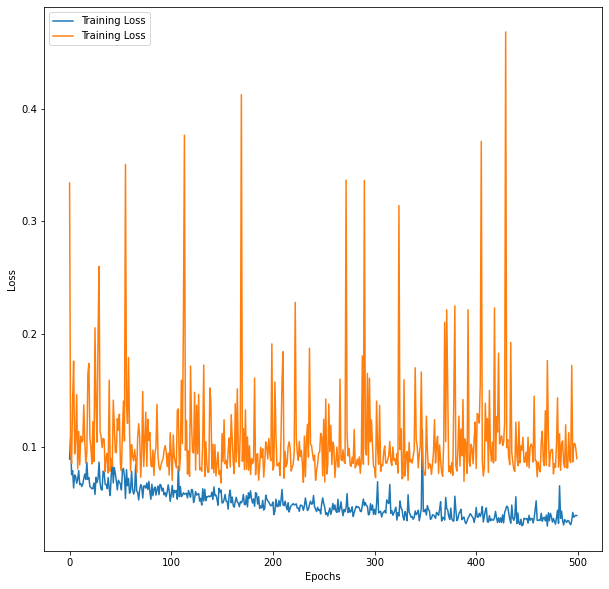

In [116]:
plt.figure(figsize=(10,10))
plt.plot(hist.history["loss"],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.legend()




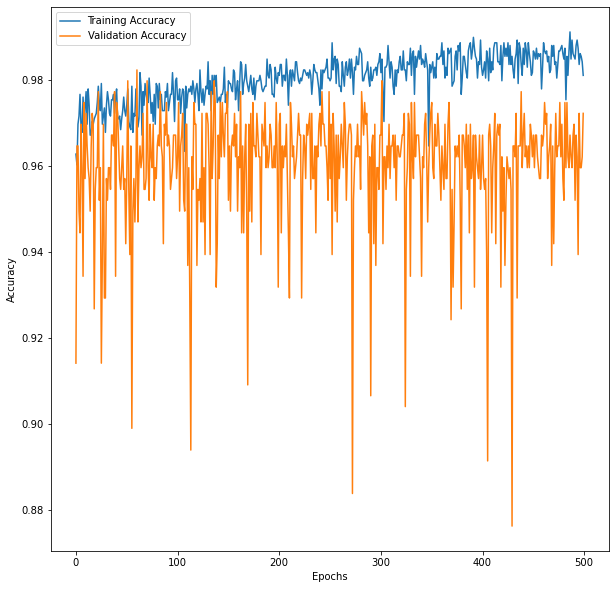

In [117]:
plt.figure(figsize=(10,10))
plt.plot(hist.history["accuracy"],label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

In [120]:
model.evaluate(x_tr,y_tr,)  # loss and accuracy

62/62 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9854


[0.03926935791969299, 0.9853535294532776]

In [119]:
model.evaluate(x_ts,y_ts)

7/7 [==============================] - 0s 4ms/step - loss: 0.0589 - accuracy: 0.9636


[0.05889351665973663, 0.9636363387107849]

In [135]:
import numpy as np
def cross_vald_score(n_fold, model,X,y):
    loss,accuracy=[],[]
    for i in range(n_fold):
        x_tr,x_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.05,random_state=i)
        los,acc =model.evaluate(x_tr,y_tr)
        loss.append(los)
        accuracy.append(acc)
    return {"Loss":np.array(loss).mean(),"Accuracy": np.array(accuracy).mean()}
    

In [138]:
cross_vald_score(100,model,x_tr,y_tr)

59/59 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9862


59/59 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9846


{'Loss': 0.03922465927898884, 'Accuracy': 0.9853535270690919}

In [137]:
cross_vald_score(100,model,x_ts,y_ts)

7/7 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9617


7/7 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9617


{'Loss': 0.05862130157649517, 'Accuracy': 0.9640669929981232}

In [139]:
from sklearn.metrics import classification_report as csr

In [146]:
y_pd= model.predict_proba(x_ts)
y_pd

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [151]:
np.argmax(y_pd,axis=1)

array([18, 16,  4,  7,  4,  4, 19,  1, 15, 16, 20, 17, 10, 20, 14, 19,  1,
        5,  0,  1, 13,  3, 21, 14, 18, 11,  6,  5,  5, 19,  1,  2, 14,  5,
        7, 20,  6,  8,  9, 17, 11, 13, 18,  2,  3,  2, 13, 13,  2,  3, 12,
        2, 12,  8,  4, 17,  3,  6,  1,  8,  7, 21, 14, 17,  9, 16, 13, 17,
       21,  4, 14, 21,  7,  6,  3, 10, 18,  0, 11, 21,  7,  8, 15, 18, 10,
        9,  5,  4, 11,  5,  6,  8, 14, 13, 20,  4, 14, 19, 12, 10, 16,  8,
       16, 11, 21, 17, 16, 18, 12,  5, 20,  2, 15,  3, 19,  2,  4,  9, 12,
        0, 19,  6, 16, 19,  3, 10, 15,  9, 20,  0, 16,  2, 21,  0, 18,  3,
       12,  3, 10,  5, 10,  4, 20, 11,  7,  9,  5,  2,  6, 11, 12, 13, 18,
       19,  5, 14,  1,  6, 18,  9,  5,  0, 11,  1,  0,  0, 11, 16,  1, 19,
       13, 12,  2, 12,  6, 18, 15,  0, 19, 16, 15, 10, 20,  4,  7,  8,  1,
       20,  7, 21,  8,  9, 20,  6, 17, 21,  2,  0, 20, 14,  1, 10, 14, 15,
        7,  9, 13, 10, 12,  7, 15, 21,  3, 18, 20, 15,  8, 12, 15, 17],
      dtype=int64)

In [153]:
y_ts.values

array([18, 16,  4,  7,  4,  4, 19,  1, 15, 16, 20, 17, 10, 20, 14, 19,  1,
        5,  0,  1, 13,  3, 21, 14, 18, 11,  6,  5,  5, 19,  1,  2, 14,  5,
        7, 20,  6,  8,  9, 17, 11, 13, 18,  2,  3,  2, 13, 13,  2,  3, 12,
        2, 17,  8,  4, 17,  3,  6,  1,  8,  7, 21, 14, 17,  9, 16, 13, 17,
       21,  4, 14, 21,  7,  6,  3, 10, 18,  0, 11, 21,  7,  8, 15, 18, 10,
        9,  5,  4, 11,  5,  6, 17, 14, 13, 20,  4, 14, 19, 12, 10, 16,  8,
       16, 11, 21, 17, 16, 18, 12, 11, 20,  2, 15,  3, 19,  2,  4,  9, 12,
        0, 19,  6, 16, 19,  3, 13, 15,  9, 20,  0, 16, 10, 21,  0, 18,  3,
       12,  3, 10,  5, 10,  4,  8, 11,  7,  9,  5,  2,  6, 11, 12, 13, 18,
       19,  5, 14,  1,  6,  9,  9,  5,  0, 11,  1,  0,  0, 11, 16,  1, 19,
       13, 12,  2, 12,  6, 18, 15,  0, 19, 16, 15, 10,  8,  4,  7,  8,  1,
       20,  7, 21,  8,  9, 20,  6, 17, 21,  2,  0, 20, 14,  1, 10, 14, 15,
        7,  9, 13, 10, 12,  7, 15, 21,  3, 18, 20, 15,  8, 12, 15, 17],
      dtype=int64)

In [155]:
print(csr(y_ts,np.argmax(y_pd,axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.91      1.00      0.95        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       0.89      0.80      0.84        10
           9       1.00      0.90      0.95        10
          10       0.90      0.90      0.90        10
          11       1.00      0.90      0.95        10
          12       0.91      1.00      0.95        10
          13       1.00      0.90      0.95        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00    

In [156]:
model.save("ANN.h5")

In [157]:
mod=tf.keras.models.load_model("ANN.h5")

In [158]:
mod.weights

[<tf.Variable 'dense_10/kernel:0' shape=(7, 200) dtype=float32, numpy=
 array([[ 0.48716104,  0.07047789,  0.04633625, ...,  0.03119015,
         -0.07447305, -0.08237156],
        [-0.41654795,  0.0668278 , -0.10855526, ..., -0.03468514,
          0.00599745,  0.22229584],
        [-0.11042853,  0.08233912, -0.02403267, ...,  0.03407091,
         -0.16702777, -0.14903083],
        ...,
        [-0.35562807, -0.20269123, -0.08569982, ..., -0.00624142,
         -0.07271924,  0.14881538],
        [-0.27920857, -0.14893915,  0.14285299, ...,  0.08126248,
         -0.10082787,  0.00471768],
        [ 0.17909782, -0.02502472, -0.02435254, ..., -0.053185  ,
         -0.07271087, -0.19598195]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(200,) dtype=float32, numpy=
 array([-9.98652168e-03, -7.80354952e-04,  1.58535072e-03, -1.13289719e-02,
         0.00000000e+00, -6.50719099e-04,  6.77409768e-02, -7.51118059e-04,
        -1.40866591e-03, -1.40140541e-02, -3.72006483e-02, -7.24890